# Inference for numerical data

### In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/nc.csv'
url_content = requests.get(df_url, verify=False).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
nc

fage  mage       mature  weeks     premie  visits      marital  gained  \
0     NaN    13  younger mom   39.0  full term    10.0      married    38.0   
1     NaN    14  younger mom   42.0  full term    15.0      married    20.0   
2    19.0    15  younger mom   37.0  full term    11.0      married    38.0   
3    21.0    15  younger mom   41.0  full term     6.0      married    34.0   
4     NaN    15  younger mom   39.0  full term     9.0      married    27.0   
..    ...   ...          ...    ...        ...     ...          ...     ...   
995  47.0    42   mature mom   40.0  full term    10.0  not married    26.0   
996  34.0    42   mature mom   38.0  full term    18.0  not married    20.0   
997  39.0    45   mature mom   40.0  full term    15.0  not married    32.0   
998  55.0    46   mature mom   31.0     premie     8.0  not married    25.0   
999  45.0    50   mature mom   39.0  full term    14.0  not married    23.0   

     weight lowbirthweight  gender      habit   whitemom  
0      7.63        not low    male  nonsmoker  not white  
1      7.88        not low    male  nonsmoker  not white  
2      6.63        not low  female  nonsmoker      white  
3      8.00        not low    male  nonsmoker      white  
4      6.38        not low  female  nonsmoker  not white  
..      ...            ...     ...        ...        ...  
995    8.44        not low    male  nonsmoker  not white  
996    6.19        not low  female  nonsmoker      white  
997    6.94        not low  female  nonsmoker      white  
998    4.56            low  female  nonsmoker  not white  
999    7.13        not low  female  nonsmoker      white  

[1000 rows x 13 columns]

In [3]:
nc.describe()

fage         mage       weeks      visits      gained      weight
count  829.000000  1000.000000  998.000000  991.000000  973.000000  1000.00000
mean    30.255730    27.000000   38.334669   12.104945   30.325797     7.10100
std      6.763766     6.213583    2.931553    3.954934   14.241297     1.50886
min     14.000000    13.000000   20.000000    0.000000    0.000000     1.00000
25%     25.000000    22.000000   37.000000   10.000000   20.000000     6.38000
50%     30.000000    27.000000   39.000000   12.000000   30.000000     7.31000
75%     35.000000    32.000000   40.000000   15.000000   38.000000     8.06000
max     55.000000    50.000000   45.000000   30.000000   85.000000    11.75000

In [4]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


## Exercise 1: Make 2 box-plots of weight by habit.

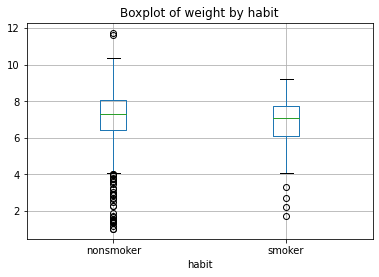

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

nc.boxplot(column = 'weight', by = 'habit')
plt.title('Boxplot of weight by habit')
plt.suptitle('')
plt.show();

In [6]:
nc.groupby(['habit'])['weight'].mean()

habit
nonsmoker    7.144273
smoker       6.828730
Name: weight, dtype: float64

In [7]:
import statsmodels.stats.weightstats as st

nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

dsw1 = st.DescrStatsW(nc_weightANDsmoker)
dsw2 = st.DescrStatsW(nc_weightANDnonsmoker)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_smoker = dsw1.nobs
n_nonsmoker = dsw2.nobs
mean_smoker = dsw1.mean
mean_nonsmoker = dsw2.mean
sd_smoker = dsw1.std
sd_nonsmoker = dsw2.std
print(f'n_smoker = {n_smoker}')
print(f'mean_smoker = {mean_smoker}')
print(f'sd_smoker = {sd_smoker}')
print()
print(f'n_nonsmoker = {n_nonsmoker}')
print(f'mean_nonsmoker = {mean_nonsmoker}')
print(f'sd_nonsmoker = {sd_nonsmoker}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_smoker = 126.0
mean_smoker = 6.828730158730159
sd_smoker = 1.380668106117173

n_nonsmoker = 873.0
mean_nonsmoker = 7.144272623138601
sd_nonsmoker = 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: Z = -2.3590109449334946
p-value = 0.018323715325166526
reject null hypothesis


In [8]:
nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

x_bar = np.mean(nc_weightANDsmoker)
x_std = np.std(nc_weightANDsmoker)

y_bar = np.mean(nc_weightANDnonsmoker)
y_std = np.std(nc_weightANDnonsmoker)

S_xy = np.sqrt((x_std**2)/len(nc_weightANDsmoker) + (y_std**2)/len(nc_weightANDnonsmoker))

tobs = (x_bar - y_bar)/S_xy

## Exercise 2: Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.
